In [2]:
%pylab inline
%load_ext autoreload
%autoreload 2

import os, glob
import cPickle as pickle

Populating the interactive namespace from numpy and matplotlib


In [3]:
import os, sys, time
import cPickle as pickle
sys.path.append('../EXP/')
import ClevelandMcGill as C
from util import Util
reload(C)

from matplotlib import gridspec

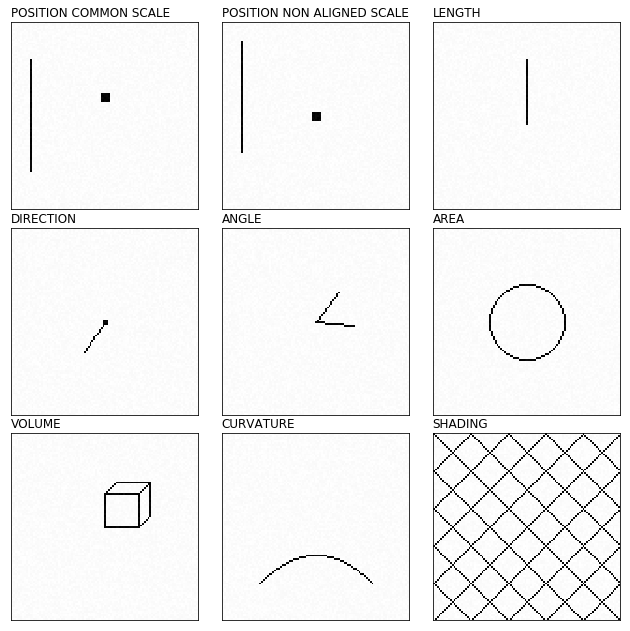

In [142]:
#
# create nine figures of elementary perceptual tasks
#

experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']

presets = {
 'C.Figure1.position_common_scale': 40, \
 'C.Figure1.position_non_aligned_scale': 10, \
 'C.Figure1.length': 35, \
 'C.Figure1.direction': 215, \
 'C.Figure1.angle': 60, \
 'C.Figure1.area': 20, \
 'C.Figure1.volume': 18, \
 'C.Figure1.curvature': 50, \
 'C.Figure1.shading': 80
}

fig = plt.figure(figsize=(11,11), facecolor='white')
gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1], hspace=.1, wspace=.1)

for j,e in enumerate(experiments):
  

    fig = plt.subplot(gs[j])

    sparse, image, label, parameters = eval(experiments[j])(preset=presets[e])
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()
    
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)

    plt.title(experiments[j].split('.')[-1].replace('_',' ').upper(), loc='left')
            
    plt.imshow(image, cmap='Greys', interpolation='none')
    
plt.savefig('../PAPER/gfx/figure1_overview.pdf', bbox_inches='tight', pad_inches=0)

Stored ../PAPER/gfx/position_common_scale.pdf
Stored ../PAPER/gfx/position_non_aligned_scale.pdf
Stored ../PAPER/gfx/length.pdf
Stored ../PAPER/gfx/direction.pdf
Stored ../PAPER/gfx/angle.pdf
Stored ../PAPER/gfx/area.pdf
Stored ../PAPER/gfx/volume.pdf
Stored ../PAPER/gfx/curvature.pdf
Stored ../PAPER/gfx/shading.pdf


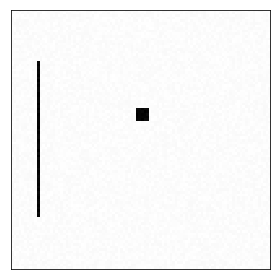

In [ ]:
#
# create nine figures of elementary perceptual tasks
#

experiments = ['C.Figure1.position_common_scale', \
               'C.Figure1.position_non_aligned_scale', \
               'C.Figure1.length', \
               'C.Figure1.direction', \
               'C.Figure1.angle', \
               'C.Figure1.area', \
               'C.Figure1.volume', \
               'C.Figure1.curvature', \
               'C.Figure1.shading']

presets = {
 'C.Figure1.position_common_scale': 40, \
 'C.Figure1.position_non_aligned_scale': 10, \
 'C.Figure1.length': 35, \
 'C.Figure1.direction': 215, \
 'C.Figure1.angle': 60, \
 'C.Figure1.area': 20, \
 'C.Figure1.volume': 18, \
 'C.Figure1.curvature': 50, \
 'C.Figure1.shading': 80
}

# fig = plt.figure(figsize=(11,11), facecolor='white')
# gs = gridspec.GridSpec(3, 3, width_ratios=[1,1,1], hspace=.1, wspace=.1)

for j,e in enumerate(experiments):
  

#     fig = plt.subplot(gs[j])

    fig = plt.figure(facecolor='white')

    sparse, image, label, parameters = eval(experiments[j])(preset=presets[e])
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()
    
    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)

#     plt.title(experiments[j].split('.')[-1].replace('_',' ').upper(), loc='left')
            
    plt.imshow(image, cmap='Greys', interpolation='none')
    c_file = '../PAPER/gfx/'+e.split('.')[-1]+'.pdf'
    print 'Stored', c_file
    plt.savefig(c_file, bbox_inches='tight', pad_inches=0)

In [28]:
already_there = []
howmany = 0
for i in range(1000000):
    
    if i % 100000 == 0:
        print i, 'checkers!!'

        

    data,label = C.Figure3.generate_datapoint()
    
    if data in already_there:
        continue
        
    already_there.append(data)
    
    howmany += 1
    

0 checkers!!


KeyboardInterrupt: 

In [27]:
i

107256

In [25]:
howmany

86796

stored ../PAPER/gfx/figure3_Pie_Chart.pdf
stored ../PAPER/gfx/figure3_Bar_Chart.pdf


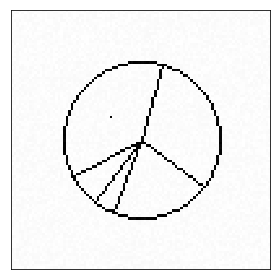

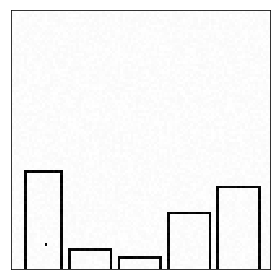

In [4]:
#
# position angle
#
X_bar = np.zeros((1, 100, 100), dtype=np.float32)
X_pie = np.zeros((1, 100, 100), dtype=np.float32)
y = np.zeros((1,5), dtype=np.float32)

for n in range(1):
    data,label = C.Figure3.generate_datapoint()

    image = C.Figure3.data_to_piechart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_pie[n] = image
    
    image = C.Figure3.data_to_barchart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_bar[n] = image
    
    y[n] = label
    
X_min = X_bar.min()
X_max = X_bar.max()
X_bar -= X_min
X_bar /= (X_max - X_min)
X_bar -= .5

X_min = X_pie.min()
X_max = X_pie.max()
X_pie -= X_min
X_pie /= (X_max - X_min)
X_pie -= .5

fig3_titles = ['Pie Chart', 'Bar Chart']
fig3_images = [X_pie[0], X_bar[0]]

# fig = plt.figure(figsize=(7.3,7.3), facecolor='white')
# gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], hspace=.1, wspace=.1)

for j in range(2):
  
    fig = plt.figure(facecolor='white')

    image = fig3_images[j]
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)
    
#     plt.title(fig3_titles[j].upper(), loc='left')
            
    plt.imshow(image, cmap='Greys', interpolation='none')
    fname = '../PAPER/gfx/figure3_'+fig3_titles[j].replace(' ','_')+'.pdf'
    print 'stored', fname
    plt.savefig(fname, bbox_inches='tight', pad_inches=0)

In [ ]:
#
# position angle
#
X_bar = np.zeros((1, 100, 100), dtype=np.float32)
X_pie = np.zeros((1, 100, 100), dtype=np.float32)
y = np.zeros((1,5), dtype=np.float32)

for n in range(1):
    data,label = C.Figure3.generate_datapoint()

    image = C.Figure3.data_to_piechart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_pie[n] = image
    
    image = C.Figure3.data_to_barchart(data)
    # we need float
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    X_bar[n] = image
    
    y[n] = label
    
X_min = X_bar.min()
X_max = X_bar.max()
X_bar -= X_min
X_bar /= (X_max - X_min)
X_bar -= .5

X_min = X_pie.min()
X_max = X_pie.max()
X_pie -= X_min
X_pie /= (X_max - X_min)
X_pie -= .5

fig3_titles = ['Pie Chart', 'Bar Chart']
fig3_images = [X_pie[0], X_bar[0]]

fig = plt.figure(figsize=(7.3,7.3), facecolor='white')
# gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], hspace=.1, wspace=.1)

for j in range(2):
  
    fig = plt.subplot(gs[j])

    image = fig3_images[j]
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)
    
    plt.title(fig3_titles[j].upper(), loc='left')
            
    plt.imshow(image, cmap='Greys', interpolation='none')
plt.savefig('../PAPER/gfx/figure3_overview.pdf', bbox_inches='tight', pad_inches=0)

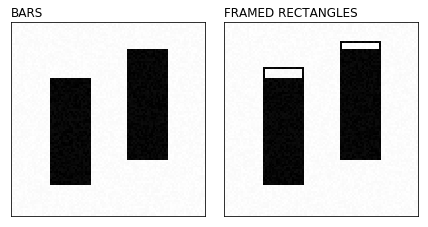

In [146]:
#
# bars and framed rectangles
#
images = [None, None]

data, label, parameters = C.Figure12.generate_datapoint()
data = [20, 23, 55, 60, 10, 57 ]

image = C.Figure12.data_to_bars(data)
# we need float
image = image.astype(np.float32)
image += np.random.uniform(0, 0.05,(100,100))
images[0] = image
    
image = C.Figure12.data_to_framed_rectangles(data)
# we need float
image = image.astype(np.float32)
image += np.random.uniform(0, 0.05,(100,100))
images[1] = image
    
fig3_titles = ['Bars', 'Framed Rectangles']

fig = plt.figure(figsize=(7.3,7.3), facecolor='white')
gs = gridspec.GridSpec(1, 2, width_ratios=[1,1], hspace=.1, wspace=.1)

for j in range(2):
  
    fig = plt.subplot(gs[j])

    image = images[j]
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)
    
    plt.title(fig3_titles[j].upper(), loc='left')
            
    plt.imshow(image, cmap='Greys', interpolation='none')
plt.savefig('../PAPER/gfx/figure12_overview.pdf', bbox_inches='tight', pad_inches=0)

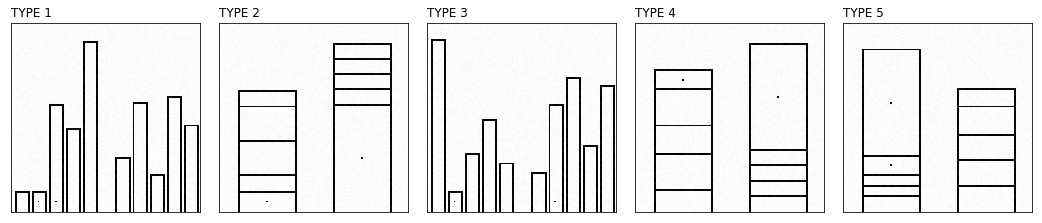

In [145]:
#
# position length
#
images = [None]*5

data, label = C.Figure4.generate_datapoint()

for n in range(5):
    
    
    image = eval('C.Figure4.data_to_type'+str(n+1))(data)
    image = image.astype(np.float32)
    image += np.random.uniform(0, 0.05,(100,100))
    images[n] = image
    
fig = plt.figure(figsize=(18.3,12), facecolor='white')
gs = gridspec.GridSpec(1, 5, width_ratios=[1,1,1,1,1], hspace=.1, wspace=.1)

for j in range(5):
  
    fig = plt.subplot(gs[j])

    image = images[j]
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)
    
    plt.title(('Type '+str(j+1)).upper(), loc='left')
            
    plt.imshow(image, cmap='Greys', interpolation='none')
plt.savefig('../PAPER/gfx/figure4_overview.pdf', bbox_inches='tight', pad_inches=0)

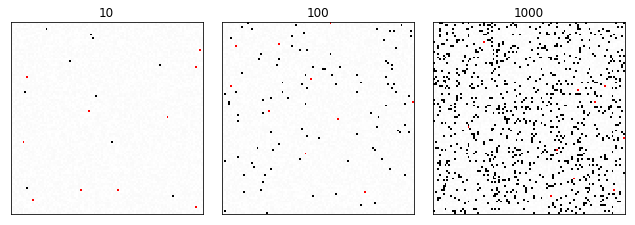

In [147]:
#
# weber's law
#
images = [None]*3

images[0] = C.Weber.generate(base=10, to_add=10, label=2)
images[1] = C.Weber.generate(base=100, to_add=10, label=2)
images[2] = C.Weber.generate(base=1000, to_add=10, label=2)
    
for j,i in enumerate(images):

  
  i_3d = np.stack((i,)*3, -1)
  
  i_3d[i==0] = (255,255,255)
  noise = np.random.uniform(0, 0.025,(100,100))
  noise *= 255
  noise = np.stack((noise,)*3, -1)
  i_3d -= noise.astype(np.uint8)
  
  i_3d[i==1] = (0,0,0)
  i_3d[i==2] = (255,0,0)
  
  images[j] = i_3d
  
fig = plt.figure(figsize=(11,11), facecolor='white')
gs = gridspec.GridSpec(1, 3, width_ratios=[1,1,1], hspace=.1, wspace=.1)

for j in range(3):
  
    fig = plt.subplot(gs[j])

    image = images[j]
#     image = image.astype(np.float32)
#     image += (np.random.uniform(0, 0.05,(100,100,3)))
    
    ax = plt.gca()
    from matplotlib.ticker import NullFormatter
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.xaxis.set_ticks_position('none') 
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_ticks_position('none') 
    plt.tight_layout()

    ax.set_xticklabels('')
    ax.set_yticklabels('')
    ax.set_xticks(np.arange(-.5, 100, 10), minor=False);
    ax.set_yticks(np.arange(-.5, 100, 10), minor=False);
#     ax.grid(which='major', color='gray', linestyle=':', linewidth='0.5')
    ax.set_axisbelow(True)
    
    plt.title((''+str(10**(j+1))).upper(), loc='center')
            
    plt.imshow(image, interpolation='none')
plt.savefig('../PAPER/gfx/weber_overview.pdf', bbox_inches='tight', pad_inches=0)

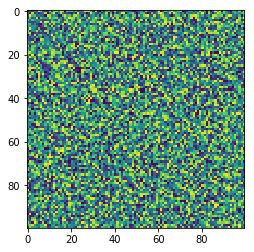

In [130]:
imshow(noise)

In [134]:
6/2

3